In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_pickle("D:/Wake word detection/Processed_data_file/audio_data.csv")

In [3]:
X = df["feature"].values
X = np.concatenate(X, axis=0).reshape(len(X), 40)

y = np.array(df["class_label"].tolist())
y = to_categorical(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = Sequential([
    Dense(256, input_shape=X_train[0].shape),
    Activation('relu'),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 5

In [7]:
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)


In [8]:
print("Model Score: \n")
history = model.fit(X_train, y_train, epochs=1000)
model.save("D:/Wake word detection/Saved Models/Tensorflow_wakeword.h5")
score = model.evaluate(X_test, y_test)
print(score)

Model Score: 

Epoch 1/1000
5/5 [==============================] - 1s 6ms/step - loss: 36.5162 - accuracy: 0.5796
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 40.4595 - accuracy: 0.4777
Epoch 3/1000
5/5 [==============================] - 0s 4ms/step - loss: 30.8632 - accuracy: 0.4841
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 25.4049 - accuracy: 0.5414
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 21.3425 - accuracy: 0.5605
Epoch 6/1000
5/5 [==============================] - 0s 7ms/step - loss: 18.8870 - accuracy: 0.5541
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 15.8741 - accuracy: 0.5478
Epoch 8/1000
5/5 [==============================] - 0s 6ms/step - loss: 14.8269 - accuracy: 0.5860
Epoch 9/1000
5/5 [==============================] - 0s 6ms/step - loss: 12.0119 - accuracy: 0.6178
Epoch 10/1000
5/5 [==============================] - 0s 4ms/step - loss: 17.1951 - accuracy: 0

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.2528 - accuracy: 0.9500
[0.25280001759529114, 0.949999988079071]


In [11]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Model Classification Report: 

2/2 [==============================] - 0s 4ms/step


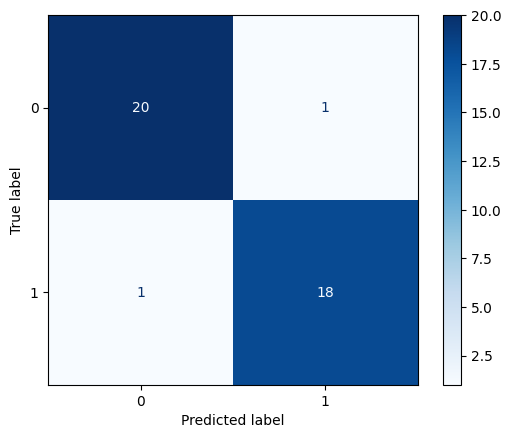

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      0.95      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [12]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(np.argmax(y_test, axis=1), y_pred))